# Chapitre 2

## Introduction

\draw[fill] (0.357143, 0.812214) circle (0.10);
\draw[fill] (0.948918, 1.143265) circle (0.10);
\draw[fill] (1.187496, 1.678099) circle (0.10);
\draw[fill] (1.777419, 1.333357) circle (0.10);
\draw[fill] (2.258380, 2.091978) circle (0.10);
\draw[fill] (3.509795, 2.169851) circle (0.10);
\draw[fill] (4.554073, 2.923194) circle (0.10);
\draw[domain=0:5.000000, smooth, variable=\x, red] 
     plot ({\x}, {0.788978 + \x * 0.454260});


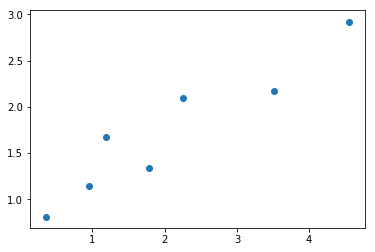

In [37]:
import numpy as np
import pylab as pl
from sklearn.linear_model import LinearRegression

f = lambda x: 0.4 + 3/5 * x
N = 7
xs = [5/7/2]
for i in range(N-1):
    xs.append(xs[i] + np.random.rand(1)[0] * 2 * 5 / 7)
ys = f(np.array(xs)) + np.random.rand(N)*1.2 - 0.6
for i in range(N):
    line = "\draw[fill] (%f, %f) circle (0.10);"
    print(line % (xs[i], ys[i]))

xp = [[a] for a in xs]
reg = LinearRegression().fit(xp, ys)
line = "\draw[domain=0:%f, smooth, variable=\\x, red] \n \
    plot ({\\x}, {%f + \\x * %f});"
print(line % (max(5, xs[-1]+0.2), reg.predict([[0]]), reg.coef_))

pl.scatter(xs, ys)
pl.show()

## Coefficient d'apprentissage

\draw[domain=1.181978:6.956124, smooth, variable=\x, blue] 
     plot ({\x}, {0.5 * (\x - 4)^2});
\draw[->, greenTikz] (2.000000, 2.000000) -- (3.500000, 0.125000);
\draw[->, red] (2.000000, 2.000000) -- (6.160000, 2.332800);
\draw[->, greenTikz] (3.500000, 0.125000) -- (3.875000, 0.007812);
\draw[->, red] (6.160000, 2.332800) -- (1.667200, 2.720978);
\draw[->, greenTikz] (3.875000, 0.007812) -- (3.968750, 0.000488);
\draw[->, red] (1.667200, 2.720978) -- (6.519424, 3.173749);


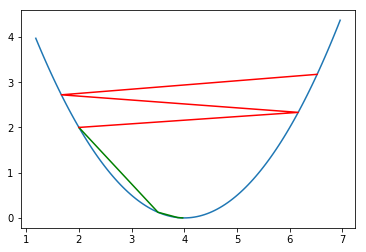

In [52]:
f = lambda x: 0.5*(x - 4)**2
fp = lambda x: (x - 4)

def descente(a, x0, n):
    res = [x0]
    for _ in range(n):
        res.append(res[-1] - a*fp(res[-1]))
    return res

N = 3
d1 = descente(0.75, 2, N)
d2 = descente(2.08, 2, N)
miX, maX = min(d1 + d2), max(d1 + d2)
xs = [miX + (maX - miX) * (i-10) / 100 for i in range(120)]
ys = f(np.array(xs))
y1s = f(np.array(d1))
y2s = f(np.array(d2))
line = "\draw[domain=%f:%f, smooth, variable=\\x, blue] \n \
    plot ({\\x}, {0.5 * (\\x - 4)^2});"
print(line % (xs[0], xs[-1]))
line = "\draw[->, %s] (%f, %f) -- (%f, %f);"
for i in range(N):
    print(line % ("greenTikz", d1[i], y1s[i], d1[i+1], y1s[i+1]))
    print(line % ("red", d2[i], y2s[i], d2[i+1], y2s[i+1]))

pl.plot(xs, ys)
pl.plot(d1, y1s, "g")
pl.plot(d2, y2s, "r")
pl.show()

## Régularisation

(0.342898, 0.939373)
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 0.758839 * cos(\t) + 0.110799 * sin(\t)}, {1.700000 + -0.276998 * cos(\t) + 0.303536 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 1.517678 * cos(\t) + 0.221598 * sin(\t)}, {1.700000 + -0.553996 * cos(\t) + 0.607071 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 2.276518 * cos(\t) + 0.332398 * sin(\t)}, {1.700000 + -0.830994 * cos(\t) + 0.910607 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({1.800000 + 3.035357 * cos(\t) + 0.443197 * sin(\t)}, {1.700000 + -1.107992 * cos(\t) + 1.214143 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 0.822338 * cos(\t) + 0.120071 * sin(\t)}, {1.700000 + -0.300177 * cos(\t) + 0.328935 * sin(\t)});
\draw[domain=0:360, smooth, variable=\t, very thick] 
     plot ({10.800000 + 1.644677 * cos(\t) + 0.24

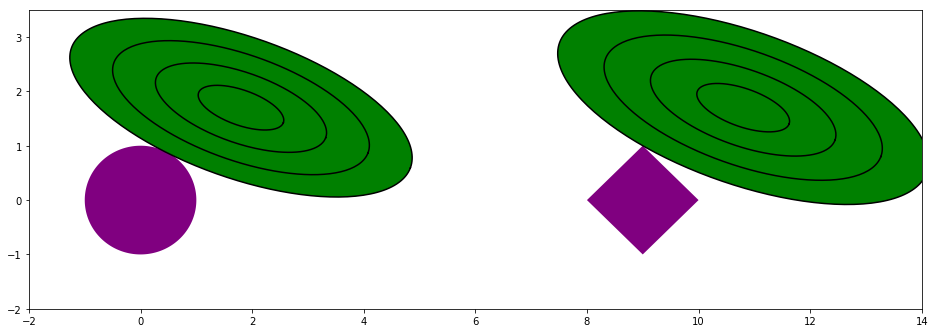

In [91]:
import numpy as np
import pylab as pl

theta = -0.35
scale = 0.4
c, s = np.cos(theta), np.sin(theta)
M = np.matrix([[c, -scale*s], [s, scale*c]])
x0, y0 = 1.8, 1.7
print("(%f, %f)" % (-s, c))
v = np.matrix([x0 + s, y0 - c]).T
vi = M.I @ v
d = (vi.T @ vi).A[0] ** 0.5
v = np.matrix([x0, y0-1]).T
vi = M.I @ v
d2 = (vi.T @ vi).A[0] ** 0.5

fig = pl.figure(figsize=(16, 5.5))
pl.xlim(-2, 14)
pl.ylim(-2, 3.5)
N = 100
a = np.array([np.pi * i / N for i in range(2*N+1)])
p = M @ np.array([np.cos(a), np.sin(a)])
curve = "\draw[domain=0:360, smooth, variable=\\t, very thick] \n \
    plot ({%f + %f * cos(\\t) + %f * sin(\\t)}, {%f + %f * cos(\\t) + %f * sin(\\t)});"
for sc in [d*(i+1)/4 for i in range(4)]:
    x = x0 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
for sc in [d2*(i+1)/4 for i in range(4)]:
    x = x0 + 9 + sc * p.A[0]
    y = y0 + sc * p.A[1]
    pl.plot(x, y, "black")
    print(curve % (x0 + 9, sc*M[0, 0], sc*M[0, 1], y0, sc*M[1, 0], sc*M[1, 1]))
pl.fill(x, y, "g")
pl.fill(np.cos(a), np.sin(a), "purple")
pl.fill([9, 8, 9, 10], [1, 0, -1, 0], "purple")
pl.show()